In [54]:
import numpy as np  #行列計算や数値を扱いやすくするライブラリ
import pandas as pd #Excelのような表形式のデータを扱いやすくするライブラリ
import matplotlib.pyplot as plt #グラフを描画するためのライブラリ
import seaborn as sns   #（綺麗な）グラフを描画するためのライブラリ

%matplotlib inline

# データの理解・可視化

In [55]:
# データの読み込み
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [56]:
# データの中身の確認
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
# データの中身の確認
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [58]:
# データサイズの確認
print('学習データの大きさ:', train_df.shape)
print('テストデータの大きさ:', test_df.shape)

学習データの大きさ: (891, 12)
テストデータの大きさ: (418, 11)


In [59]:
# データ型の確認
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [60]:
# 欠損値の確認
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [61]:
# 欠損値の確認
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [62]:
# データ型と欠損値の確認
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [63]:
# データの連結
df = pd.concat([train_df, test_df], ignore_index=True)
df.shape

(1309, 12)

In [64]:
# データ連結の確認
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [65]:
# 性別ごとの人数を算出
tmp = df.groupby('Sex')['PassengerId'].count()
tmp

Sex
female    466
male      843
Name: PassengerId, dtype: int64

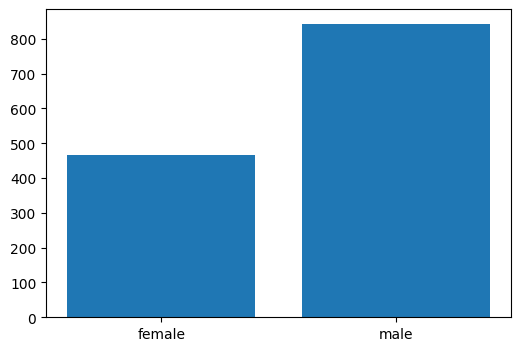

In [66]:
# matplotlibによる性別ごとの可視化
plt.figure(figsize=(6, 4))

plt.bar(tmp.index, tmp.values)
plt.show()

<Axes: xlabel='Sex'>

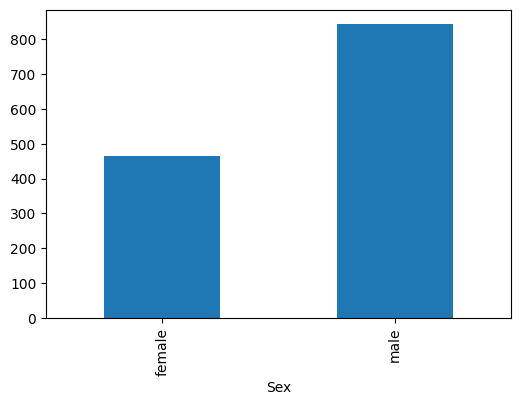

In [67]:
# pandasによる性別ごとの可視化
tmp.plot(kind='bar', figsize=(6, 4))

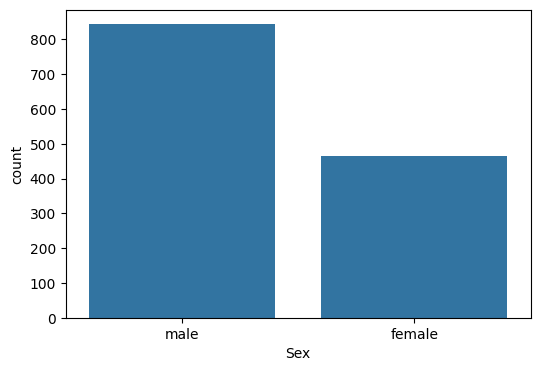

In [68]:
# seabornによる性別ごとの可視化
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sex') #集計せずに可視化できる
plt.show()

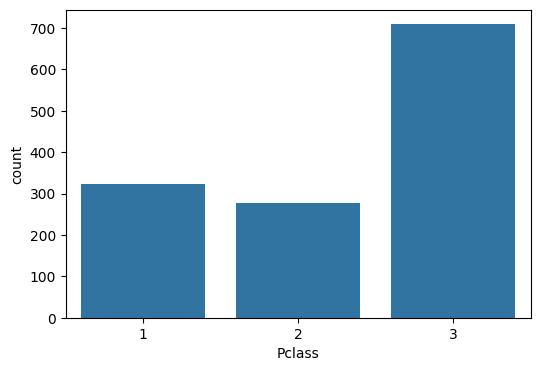

In [69]:
# seabornによるチケットごとの可視化
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Pclass')
plt.show()

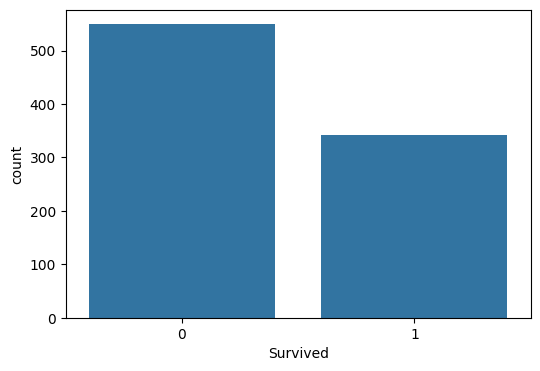

In [72]:
# seabornによる生死ごとの可視化
plt.figure(figsize=(6, 4))
sns.countplot(data=train_df, x='Survived')
plt.show()

# データの加工・前処理

In [74]:
# 使わないカラムを削除
df2 = df.drop(columns=['Cabin', 'Fare', 'Ticket', 'SibSp', 'Parch', 'Name'])
df2.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked
0,1,0.0,3,male,22.0,S
1,2,1.0,1,female,38.0,C
2,3,1.0,3,female,26.0,S
3,4,1.0,1,female,35.0,S
4,5,0.0,3,male,35.0,S


In [82]:
# 欠損値の補完（Embarked）
# Embarkedにおける欠損値の数を再確認
print('欠損値の数:', df2['Embarked'].isnull().sum())

欠損値の数: 2


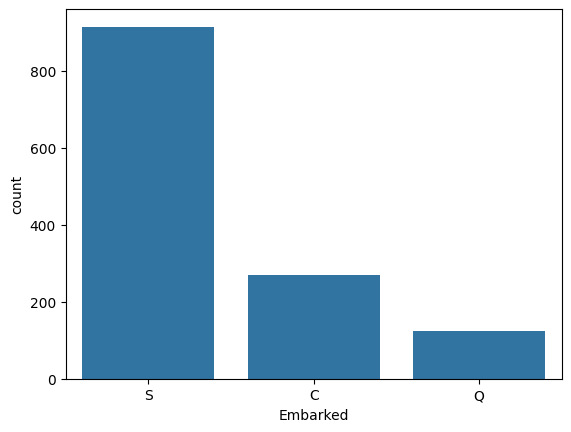

In [83]:
# Embarkedにおける最頻値の確認
plt.figsize=(6, 4)
sns.countplot(data=df2, x='Embarked')
plt.show()

In [93]:
# Embarkedの欠損値を最頻値で補完
df3 = df2.copy()
df3['Embarked'] = df3['Embarked'].fillna('S')
print('欠損値の数', df3['Embarked'].isnull().sum())

欠損値の数 0


In [94]:
# 欠損値の補完（Age）
# Ageにおける欠損値の数を再確認
print('欠損値の数:', df3['Age'].isnull().sum())

欠損値の数: 263


In [95]:
# Ageの分布を確認（最大値と最小値を算出）
print('最小値:', df3['Age'].min())
print('最大値:', df3['Age'].max())

最小値: 0.17
最大値: 80.0


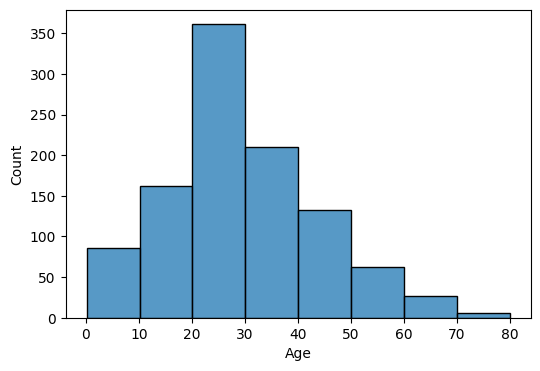

In [96]:
# Ageの分布を可視化（ヒストグラム）
plt.figure(figsize=(6, 4))
sns.histplot(df3['Age'], kde=False, bins=8)
plt.show()

In [97]:
# Ageの平均値と中央値を比較
print('平均値:', df3['Age'].mean())
print('中央値:', df3['Age'].median())

平均値: 29.881137667304014
中央値: 28.0


In [98]:
# Ageの欠損値を中央値で補完
df4 = df3.copy()
age_median = df4['Age'].median()
df4['Age'] = df4['Age'].fillna(age_median)
print('欠損値の数:', df4['Age'].isnull().sum())

欠損値の数: 0


In [104]:
# カテゴリ変数（Embarked）の数値変換（ワンホットエンコーディング）
ohe_embarked = pd.get_dummies(df4['Embarked'], prefix='Embarked')
df5 = pd.concat([df4, ohe_embarked], axis=1)
df5.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,male,22.0,S,False,False,True
1,2,1.0,1,female,38.0,C,True,False,False
2,3,1.0,3,female,26.0,S,False,False,True
3,4,1.0,1,female,35.0,S,False,False,True
4,5,0.0,3,male,35.0,S,False,False,True


In [106]:
df6 = df5.drop(columns='Embarked')
df6.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,male,22.0,False,False,True
1,2,1.0,1,female,38.0,True,False,False
2,3,1.0,3,female,26.0,False,False,True
3,4,1.0,1,female,35.0,False,False,True
4,5,0.0,3,male,35.0,False,False,True


In [109]:
# 性別をラベルエンコーディングで数値変換
df6['Sex'] = pd.get_dummies(df6['Sex'], drop_first=True)
df6.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,True,22.0,False,False,True
1,2,1.0,1,False,38.0,True,False,False
2,3,1.0,3,False,26.0,False,False,True
3,4,1.0,1,False,35.0,False,False,True
4,5,0.0,3,True,35.0,False,False,True


In [116]:
# データセットの作成（学習データとテストデータに分割）
train = df6[~df6['Survived'].isnull()]
test = df6[df6['Survived'].isnull()]
test = test.drop(columns='Survived')

In [117]:
# 目的変数と説明変数に分割
y_train = train['Survived']
X_train = train.drop(columns=['Survived', 'PassengerId'])
print('元のdf:', train.shape)
print('説明変数:', X_train.shape)
print('目的変数:', y_train.shape)

元のdf: (891, 8)
説明変数: (891, 6)
目的変数: (891,)


# モデル（決定木）の作成

In [119]:
from sklearn.tree import DecisionTreeClassifier

In [121]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# モデルの評価（ホールドアウト）

In [136]:
# データを学習用と評価用に分割（stratifyで、目的変数の割合を統一）
from sklearn.model_selection import train_test_split
x_tr, x_va, y_tr, y_va = train_test_split(
    X_train, 
    y_train, 
    test_size=0.2, 
    stratify=y_train, 
    random_state=42)

print('学習用:', x_tr.shape, y_tr.shape)
print('評価用:', x_va.shape, y_va.shape)

学習用: (712, 6) (712,)
評価用: (179, 6) (179,)


In [137]:
# 目的変数の内訳を確認
print('学習用:\n', y_tr.value_counts())
print('評価用:\n', y_va.value_counts())

学習用:
 Survived
0.0    439
1.0    273
Name: count, dtype: int64
評価用:
 Survived
0.0    110
1.0     69
Name: count, dtype: int64


In [138]:
model.fit(x_tr, y_tr)

DecisionTreeClassifier(random_state=42)

In [146]:
# 学習用・評価用データの予測値を計算
y_tr_pred = model.predict(x_tr)
y_va_pred = model.predict(x_va)

In [147]:
from sklearn.metrics import accuracy_score

In [148]:
# 予測精度を計算・確認
accuracy_tr = accuracy_score(y_tr, y_tr_pred)
accuracy_va = accuracy_score(y_va, y_va_pred)

print('学習用:', accuracy_tr)
print('評価用:', accuracy_va)

学習用: 0.9058988764044944
評価用: 0.7932960893854749


In [150]:
# テストデータの予測値を計算
x_test = test.drop(columns=['PassengerId'])
y_test_pred = model.predict(x_test)

In [152]:
# 元のテストデータに予測値を連結
test['Survived'] = y_test_pred
test.head()

,PassengerId,Pclass,Sex,Age,Embarked_C,Embarked_Q,Embarked_S,Survived
891,892,3,True,34.5,False,True,False,0.0
892,893,3,False,47.0,False,False,True,0.0
893,894,2,True,62.0,False,True,False,0.0
894,895,3,True,27.0,False,False,True,0.0
895,896,3,False,22.0,False,False,True,1.0


In [154]:
# 予測結果をフォーマットに従ってデータフレーム化
submit_df = test[['PassengerId', 'Survived']].set_index('PassengerId')
submit_df.head()

,Survived
PassengerId,
892,0.0
893,0.0
894,0.0
895,0.0
896,1.0


In [156]:
# Survivedのデータ型をint型に変換
submit_df['Survived'] = submit_df['Survived'].astype(int)
submit_df.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [157]:
# 予測結果をCSVファイルに出力
submit_df.to_csv('submission.csv')